# Projette ERAI, tas, sur la base des modèles (analyse EOF)

(1) Reconstruit les données avec les PCs et EOFs des tas. 

(2) Retrouver les PCs des observations BEST. 

Attention : modèles en Kelvin et BEST en Celsius

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# EOF, tas_mean and PCs

In [3]:
Mean =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_tas_mean.npy').to_xarray().to_array()
Mean = Mean[0,:,:].rename({'variable':'mode'})
Mean

<xarray.DataArray (lat: 128, lon: 256)>
array([[225.45741, 225.45741, 225.45741, ..., 225.45741, 225.45741,
        225.45741],
       [228.16461, 228.16461, 228.16461, ..., 228.16461, 228.16461,
        228.16461],
       [228.08255, 228.08255, 228.08255, ..., 228.47594, 228.08255,
        228.08255],
       ...,
       [256.32758, 256.32758, 256.32758, ..., 256.27066, 256.32758,
        256.32758],
       [255.52611, 255.52611, 255.52611, ..., 255.52611, 255.52611,
        255.52611],
       [254.25436, 254.25436, 254.25436, ..., 254.25436, 254.25436,
        254.25436]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U7 'tasmean'

In [4]:
anom =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_tas_anom.npy').to_xarray().to_array()
anom = anom[0,:,:].rename({'variable':'mode'})
anom

<xarray.DataArray (time: 104, lat: 128, lon: 256)>
array([[[-0.71328735, -0.71328735, -0.71328735, ..., -0.71328735,
         -0.71328735, -0.71328735],
        [-1.0500488 , -1.0500488 , -1.0500488 , ..., -1.0500488 ,
         -1.0500488 , -1.0500488 ],
        [-1.1095734 , -1.1095734 , -1.1095734 , ..., -1.0765991 ,
         -1.1095734 , -1.1095734 ],
        ...,
        [ 1.4798584 ,  1.4798584 ,  1.4798584 , ...,  1.397583  ,
          1.4798584 ,  1.4798584 ],
        [ 1.6472931 ,  1.6472931 ,  1.6472931 , ...,  1.6472931 ,
          1.6472931 ,  1.6472931 ],
        [ 1.5512238 ,  1.5512238 ,  1.5512238 , ...,  1.5512238 ,
          1.5512238 ,  1.5512238 ]],

       [[-1.2076111 , -1.2076111 , -1.2076111 , ..., -1.2076111 ,
         -1.2076111 , -1.2076111 ],
        [-1.7158966 , -1.7158966 , -1.7158966 , ..., -1.7158966 ,
         -1.7158966 , -1.7158966 ],
        [-1.916214  , -1.916214  , -1.916214  , ..., -1.8565979 ,
         -1.916214  , -1.916214  ],
        ...,
        [ 0.7133789 ,  0.7133789 ,  0.7133789 , ...,  0.6425476 ,
          0.7133789 ,  0.7133789 ],
        [ 0.9304657 ,  0.9304657 ,  0.9304657 , ...,  0.9304657 ,
          0.9304657 ,  0.9304657 ],
        [ 1.6498871 ,  1.6498871 ,  1.6498871 , ...,  1.6498871 ,
          1.6498871 ,  1.6498871 ]],

       [[ 2.9716034 ,  2.9716034 ,  2.9716034 , ...,  2.9716034 ,
          2.9716034 ,  2.9716034 ],
        [ 3.1380463 ,  3.1380463 ,  3.1380463 , ...,  3.1380463 ,
          3.1380463 ,  3.1380463 ],
        [ 3.3858948 ,  3.3858948 ,  3.3858948 , ...,  3.3388977 ,
          3.3858948 ,  3.3858948 ],
        ...,
        [-0.50427246, -0.50427246, -0.50427246, ..., -0.5061493 ,
         -0.50427246, -0.50427246],
        [-0.4631958 , -0.4631958 , -0.4631958 , ..., -0.4631958 ,
         -0.4631958 , -0.4631958 ],
        [-0.42362976, -0.42362976, -0.42362976, ..., -0.42362976,
         -0.42362976, -0.42362976]],

       ...,

       [[ 0.3342743 ,  0.3342743 ,  0.3342743 , ...,  0.3342743 ,
          0.3342743 ,  0.3342743 ],
        [-0.47013855, -0.47013855, -0.47013855, ..., -0.47013855,
         -0.47013855, -0.47013855],
        [-0.42996216, -0.42996216, -0.42996216, ..., -0.45483398,
         -0.42996216, -0.42996216],
        ...,
        [ 0.0798645 ,  0.0798645 ,  0.0798645 , ...,  0.1538086 ,
          0.0798645 ,  0.0798645 ],
        [ 0.15933228,  0.15933228,  0.15933228, ...,  0.15933228,
          0.15933228,  0.15933228],
        [ 0.45866394,  0.45866394,  0.45866394, ...,  0.45866394,
          0.45866394,  0.45866394]],

       [[-2.0741882 , -2.0741882 , -2.0741882 , ..., -2.0741882 ,
         -2.0741882 , -2.0741882 ],
        [-2.4322357 , -2.4322357 , -2.4322357 , ..., -2.4322357 ,
         -2.4322357 , -2.4322357 ],
        [-2.7126617 , -2.7126617 , -2.7126617 , ..., -2.6138153 ,
         -2.7126617 , -2.7126617 ],
        ...,
        [-2.8398438 , -2.8398438 , -2.8398438 , ..., -2.8464203 ,
         -2.8398438 , -2.8398438 ],
        [-2.9755402 , -2.9755402 , -2.9755402 , ..., -2.9755402 ,
         -2.9755402 , -2.9755402 ],
        [-3.1309357 , -3.1309357 , -3.1309357 , ..., -3.1309357 ,
         -3.1309357 , -3.1309357 ]],

       [[-2.2786102 , -2.2786102 , -2.2786102 , ..., -2.2786102 ,
         -2.2786102 , -2.2786102 ],
        [-2.5054321 , -2.5054321 , -2.5054321 , ..., -2.5054321 ,
         -2.5054321 , -2.5054321 ],
        [-2.6460266 , -2.6460266 , -2.6460266 , ..., -2.6017761 ,
         -2.6460266 , -2.6460266 ],
        ...,
        [-1.8149872 , -1.8149872 , -1.8149872 , ..., -1.8203888 ,
         -1.8149872 , -1.8149872 ],
        [-2.3523407 , -2.3523407 , -2.3523407 , ..., -2.3523407 ,
         -2.3523407 , -2.3523407 ],
        [-2.689148  , -2.689148  , -2.689148  , ..., -2.689148  ,
         -2.689148  , -2.689148  ]]], dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 

In [5]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_tas.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_tas.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_tas.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_tas.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_tas.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

eofs = [eof1,eof2,eof3,eof4,eof5]

In [6]:
eofs_combined = xr.combine_nested(eofs, concat_dim='eofs')
#eofs_combined

In [7]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_tas.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_tas.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_tas.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_tas.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_tas.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

PC_df

,pc1,pc2,pc3,pc4,pc5
0,-1.036253,1.783174,0.132006,-0.607847,-1.941047
1,0.505301,-0.620046,-0.661749,0.071263,1.887987
2,1.550187,0.966963,0.211132,0.490079,-1.081055
3,0.533399,1.637583,-0.720199,1.020989,1.132725
4,0.689388,-0.106142,0.247270,-0.857747,-0.863513
...,...,...,...,...,...
97,1.127269,0.137607,-1.883097,1.363466,0.307337
98,-0.848661,-2.183300,-2.136365,0.161926,0.381609
99,-0.199264,-1.611466,-0.654372,1.134501,0.792408
100,1.703953,-0.374048,-1.039726,1.907782,-0.038282


In [8]:
pc1_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF1pc_tas.npy')
pc2_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF2pc_tas.npy')
pc3_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF3pc_tas.npy')
pc4_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF4pc_tas.npy')
pc5_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF5pc_tas.npy')

pc1_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF1pc_tas.npy')
pc2_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF2pc_tas.npy')
pc3_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF3pc_tas.npy')
pc4_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF4pc_tas.npy')
pc5_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF5pc_tas.npy')

In [9]:
PCs = [0]*102
for i in range(0,102,1):
    tmp = PC_df.iloc[i].values
    PCs[i] = tmp

PCs

[array([-1.036253  ,  1.7831736 ,  0.13200627, -0.60784733, -1.9410472 ],
       dtype=float32),
 array([ 0.50530076, -0.6200461 , -0.6617492 ,  0.07126312,  1.8879869 ],
       dtype=float32),
 array([ 1.5501868 ,  0.9669626 ,  0.2111317 ,  0.49007887, -1.0810546 ],
       dtype=float32),
 array([ 0.53339934,  1.6375835 , -0.7201993 ,  1.0209891 ,  1.1327245 ],
       dtype=float32),
 array([ 0.68938786, -0.10614232,  0.24727042, -0.8577472 , -0.8635134 ],
       dtype=float32),
 array([ 1.5023398 , -0.74393636,  2.0079553 , -0.21552847, -0.4743517 ],
       dtype=float32),
 array([-0.8357379 ,  1.0471958 ,  0.6302444 ,  0.32924467, -1.0607089 ],
       dtype=float32),
 array([ 0.7184881 ,  0.28508833,  1.2267857 , -0.0412975 , -0.7802244 ],
       dtype=float32),
 array([-1.377905  , -0.9671775 ,  1.3043481 , -0.06797209,  0.57332325],
       dtype=float32),
 array([-0.10597194,  1.5969536 ,  2.1264126 , -1.6648977 ,  0.42086658],
       dtype=float32),
 array([-0.99685633, -0.463237

# Trouver U_obs : Reconstruciton des données

X_ens = U_ens(pc) * v_ens(eof) 

Compute anomaly : X_obs = X_obs - mean_ens 

X_obs = U_obs * v_ens 

U_obs = X_obs * inv(v_ens)

## Get the ERAI datatset

In [10]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [13]:
path_observation = '/data/home/globc/peatier/obs_data/ERAI/'
filename = 'tas_1m_197901_201812_ERAI_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['t2m']
df_obs = file[variables].to_dataframe()
df_obs['t2m'] = df_obs['t2m'] #+ 273.15 # To convert Celsius into Kelvin
df_obs

t2m
lat        lon       time                  
-88.927735 0.00000   1979-01-01  250.365692
                     1979-02-01  238.130051
                     1979-03-01  226.224258
                     1979-04-01  224.171249
                     1979-05-01  219.035065
...                                     ...
 88.927735 358.59375 2018-08-01  273.330475
                     2018-09-01  267.883179
                     2018-10-01  264.582458
                     2018-11-01  254.949600
                     2018-12-01  250.992508

[15728640 rows x 1 columns]

In [14]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Data variables:
    t2m      (lat, lon) float32 228.3424 228.32414 ... 258.21964 258.22638

## Compute Anomaly

In [15]:
X_obs = obs['t2m'] - Mean
X_obs

<xarray.DataArray (lat: 128, lon: 256)>
array([[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
        2.9042969],
       [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
        1.0105591],
       [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
        1.5307465],
       ...,
       [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
        2.3217163],
       [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
        2.853592 ],
       [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
        3.9720154]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U7 'tasmean'

## Trouver U_obs

In [16]:
PCs = PC_df.to_xarray().to_array()
PCs

<xarray.DataArray (variable: 5, index: 102)>
array([[-1.03625298e+00,  5.05300760e-01,  1.55018675e+00,
         5.33399343e-01,  6.89387858e-01,  1.50233984e+00,
        -8.35737884e-01,  7.18488097e-01, -1.37790501e+00,
        -1.05971940e-01, -9.96856332e-01, -1.28898680e+00,
         6.44324481e-01, -1.32522833e+00,  1.00075483e+00,
        -5.43498993e-01,  2.48392034e+00,  5.20359814e-01,
        -3.40361804e-01, -1.40658498e+00, -3.37187320e-01,
        -1.11217320e+00,  1.02245712e+00,  7.85759151e-01,
        -1.67664170e-01,  1.07235777e+00,  2.25405383e+00,
         1.05725753e+00,  1.90405771e-01, -1.65755555e-01,
        -1.32081795e+00, -1.41482317e+00, -1.22707061e-01,
         1.69130862e+00,  3.77309889e-01,  2.39869773e-01,
        -5.51799774e-01,  3.00771624e-01,  2.77433693e-01,
        -8.30297470e-01, -7.95156211e-02,  2.32170504e-02,
         8.99386466e-01, -1.80901098e+00, -7.96374753e-02,
        -7.57456064e-01,  5.22467673e-01, -1.98332679e+00,
         1.35178745e+00, -6.80710912e-01,  7.90585995e-01,
         5.25965929e-01, -7.43455946e-01, -1.29261029e+00,
        -3.11602741e-01, -1.22958124e+00, -5.33659339e-01,
         1.31336939e+00, -8.55099022e-01, -2.02748969e-01,
        -6.08776510e-03,  1.28434300e+00, -1.73925745e+00,
        -4.23948228e-01,  6.84411228e-01, -2.36286926e+00,
        -8.85187030e-01,  2.17527643e-01,  3.22165012e-01,
         7.10247219e-01,  5.87793708e-01,  1.30027784e-02,
         6.00539684e-01,  9.04554844e-01, -8.14879000e-01,
         1.08130753e+00, -4.23513174e-01, -1.27478659e+00,
         4.81781751e-01, -4.71674412e-01, -3.93294811e-01,
         1.35616973e-01, -7.74357438e-01, -1.00953802e-01,
        -2.75147104e+00,  1.39652479e+00, -2.70898670e-01,
         1.01921104e-01,  1.08389616e+00, -9.22541320e-01,
        -7.60301232e-01, -9.47296396e-02,  5.64109266e-01,
         1.17620826e+00, -1.40272275e-01,  1.62268877e+00,
         2.57288694e-01,  1.12726927e+00, -8.48661184e-01,
        -1.99263528e-01,  1.70395327e+00,  9.39359426e-01],
       [ 1.78317356e+00, -6.20046079e-01,  9.66962576e-01,
         1.63758349e+00, -1.06142320e-01, -7.43936360e-01,
         1.04719579e+00,  2.85088331e-01, -9.67177510e-01,
         1.59695363e+00, -4.63237196e-01,  1.33043838e+00,
        -1.70259967e-01,  5.26000082e-01,  5.02907395e-01,
         1.18149567e+00, -1.08048820e+00, -2.02722144e+00,
        -1.01931095e+00, -1.66534269e+00,  3.57803255e-01,
        -1.46482363e-02,  5.63201308e-01, -2.04081750e+00,
         1.53549956e-02,  1.00700188e+00, -5.52182972e-01,
        -1.05897474e+00,  1.07311487e+00,  1.37005639e+00,
        -6.66419923e-01, -4.73882079e-01, -9.90068078e-01,
        -3.52992892e-01, -6.50647104e-01,  7.02577472e-01,
         6.70569360e-01, -3.46100539e-01, -4.89652246e-01,
        -1.03923988e+00,  4.63597119e-01,  7.97706425e-01,
         1.51652861e+00, -7.22787142e-01,  1.07727897e+00,
         5.60619414e-01,  1.07861245e+00, -1.55300319e-01,
         2.06407022e+00,  9.52925205e-01, -6.20953143e-01,
        -8.81734192e-01,  9.25621688e-01,  1.24817622e+00,
         1.44349587e+00, -1.87095141e+00, -4.42500859e-02,
         9.46752548e-01, -2.13503540e-01, -1.20957172e+00,
        -1.39821506e+00, -4.38357554e-02,  1.36844623e+00,
        -1.09369242e+00,  5.37370622e-01,  1.53469071e-01,
        -1.28989232e+00, -5.47216415e-01, -1.04046488e+00,
        -8.09404626e-02, -9.99206066e-01, -5.15611887e-01,
        -9.75266397e-02, -4.92985785e-01,  3.20450276e-01,
         6.96847677e-01, -1.19493282e+00, -1.20600268e-01,
         2.85030985e+00, -3.43573540e-01, -4.85615134e-02,
         1.20618892e+00,  3.24389413e-02,  1.14131701e+00,
         6.46436810e-01, -8.28802437e-02, -6.80742085e-01,
        -5.41186571e-01,  2.16130048e-01, -9.98793319e-02,
         1.18355751e+00,  5.15292704e-01,  4.45431113e-01,
        -1.06646204e+00, -3.79280388e-01,  8.57541382e-01,
         8.29382122e-01,  1.37607411e-01, -2.18330050e+00,
 

In [17]:
X_ens = eof1*PCs[0]+eof2*PCs[1]+eof3*PCs[2]+eof4*PCs[3]+eof5*PCs[4]
#X_ens

In [18]:
X_ens_bis = np.dot(eofs_combined.transpose(),PCs)
X_ens_bis = xr.DataArray(X_ens_bis, dims=['lon','lat','index'])
X_ens_bis

<xarray.DataArray (lon: 256, lat: 128, index: 102)>
array([[[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.6733909 , -1.0647604 , -2.7503083 , ...,  0.06587079,
         -2.550954  , -3.811042  ],
        ...,
        [-0.5300232 ,  0.3216936 , -3.5531712 , ...,  2.1423159 ,
         -2.0461388 , -0.43141863],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]],

       [[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.6733909 , -1.0647604 , -2.7503083 , ...,  0.06587079,
         -2.550954  , -3.811042  ],
        ...,
        [-0.5300232 ,  0.3216936 , -3.5531712 , ...,  2.1423159 ,
         -2.0461388 , -0.43141863],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]],

       [[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.6733909 , -1.0647604 , -2.7503083 , ...,  0.06587079,
         -2.550954  , -3.811042  ],
        ...,
        [-0.5300232 ,  0.3216936 , -3.5531712 , ...,  2.1423159 ,
         -2.0461388 , -0.43141863],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]],

       ...,

       [[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.579991  , -1.0104644 , -2.728816  , ...,  0.07455158,
         -2.518393  , -3.741927  ],
        ...,
        [-0.5210044 ,  0.31868052, -3.5620775 , ...,  2.1390874 ,
         -2.060091  , -0.43394265],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]],

       [[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.6733909 , -1.0647604 , -2.7503083 , ...,  0.06587079,
         -2.550954  , -3.811042  ],
        ...,
        [-0.5300232 ,  0.3216936 , -3.5531712 , ...,  2.1423159 ,
         -2.0461388 , -0.43141863],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]],

       [[ 3.0224457 , -0.85861015, -2.9733346 , ...,  0.65408576,
         -2.2510486 , -3.3788755 ],
        [ 3.5559642 , -1.0445585 , -2.5080998 , ...,  0.01201382,
         -2.3354743 , -3.6374674 ],
        [ 3.6733909 , -1.0647604 , -2.7503083 , ...,  0.06587079,
         -2.550954  , -3.811042  ],
        ...,
        [-0.5300232 ,  0.3216936 , -3.5531712 , ...,  2.1423159 ,
         -2.0461388 , -0.43141863],
        [-0.65702593,  0.37289506, -3.870643  , ...,  2.3833067 ,
         -2.1879685 , -0.4232468 ],
        [-0.6444871 ,  0.3493806 , -4.1214933 , ...,  2.4882247 ,
         -2.404094  , -0.45919964]]], dtype=float32)
Dimensions without coordinates: lon, lat, index

In [19]:
eofs_inv = np.linalg.pinv(eofs_combined.transpose())
#eofs_inv = xr.DataArray(eofs_inv, dims=['eofs','lon','lat'])
eofs_inv

array([[[-7.39513605e-04,  1.78612303e-03, -1.00614980e-03, ...,
         -1.84287447e-02, -2.21062806e-02, -2.68071331e-02],
        [-1.10379308e-02,  3.20899524e-02,  3.75619158e-02, ...,
         -1.05169132e-01, -1.14892744e-01, -1.18121870e-01],
        [-8.58247802e-02, -8.15134868e-02, -7.71081820e-02, ...,
         -2.95622274e-02, -2.40896009e-02, -1.25255752e-02],
        [-7.81158209e-02, -8.52241144e-02, -7.10721016e-02, ...,
         -1.38664432e-02,  2.17541610e-03,  1.91265400e-02],
        [ 1.22099072e-02,  3.85677330e-02,  5.45680672e-02, ...,
          9.61847678e-02,  9.81579795e-02,  8.95520151e-02]],

       [[ 5.08372847e-04,  3.52989510e-03,  6.53401774e-04, ...,
         -1.80690251e-02, -2.19996236e-02, -2.69053206e-02],
        [-1.27066709e-02,  2.94238608e-02,  3.47249471e-02, ...,
         -1.05991013e-01, -1.15492404e-01, -1.18544243e-01],
        [-9.13041979e-02, -8.82859975e-02, -8.35473761e-02, ...,
         -3.41397710e-02, -2.78446674e-02, -1.53615

In [20]:
U_ens = np.dot(eofs_inv,X_ens.transpose('lon','lat','index'))
#U_ens = U_ens.mean(dim=['lat','lon'])#.transpose()
U_ens

array([[[[-1.03625298e+00,  5.05300760e-01,  1.55018675e+00, ...,
          -1.99263513e-01,  1.70395327e+00,  9.39359367e-01],
         [-1.04583871e+00,  5.04621983e-01,  1.54843628e+00, ...,
          -1.82604477e-01,  1.71826136e+00,  9.38720822e-01],
         [-1.06014347e+00,  5.11964381e-01,  1.53947604e+00, ...,
          -1.72833592e-01,  1.71714640e+00,  9.49135423e-01],
         ...,
         [-9.52876031e-01,  4.33353812e-01,  1.55236053e+00, ...,
          -2.41112590e-01,  1.64044750e+00,  9.22632337e-01],
         [-9.82998073e-01,  4.45754796e-01,  1.54683793e+00, ...,
          -2.14719027e-01,  1.66222322e+00,  9.43923712e-01],
         [-1.01259136e+00,  4.78003144e-01,  1.55637956e+00, ...,
          -2.10498318e-01,  1.68977642e+00,  9.50242698e-01]],

        [[ 1.78317344e+00, -6.20046079e-01,  9.66962516e-01, ...,
          -1.61146617e+00, -3.74048233e-01, -1.23324549e+00],
         [ 1.79904795e+00, -6.24793768e-01,  9.35987353e-01, ...,
          -1.61084902e

In [21]:
U_ens = xr.DataArray(U_ens, dims=['lon','eofs','lon2', 'index'])
#U_ens_avg = U_ens.mean(dim=['lon','lon2']).transpose()
U_ens_avg = U_ens[0,:,0,:].transpose()
U_ens_avg

<xarray.DataArray (index: 102, eofs: 5)>
array([[-1.03625298e+00,  1.78317344e+00,  1.32006243e-01,
        -6.07847512e-01, -1.94104719e+00],
       [ 5.05300760e-01, -6.20046079e-01, -6.61749184e-01,
         7.12632090e-02,  1.88798678e+00],
       [ 1.55018675e+00,  9.66962516e-01,  2.11131662e-01,
         4.90078896e-01, -1.08105457e+00],
       [ 5.33399343e-01,  1.63758349e+00, -7.20199347e-01,
         1.02098906e+00,  1.13272452e+00],
       [ 6.89387858e-01, -1.06142350e-01,  2.47270375e-01,
        -8.57747197e-01, -8.63513470e-01],
       [ 1.50233984e+00, -7.43936360e-01,  2.00795531e+00,
        -2.15528399e-01, -4.74351585e-01],
       [-8.35737884e-01,  1.04719579e+00,  6.30244315e-01,
         3.29244673e-01, -1.06070888e+00],
       [ 7.18488038e-01,  2.85088331e-01,  1.22678566e+00,
        -4.12974283e-02, -7.80224383e-01],
       [-1.37790501e+00, -9.67177510e-01,  1.30434811e+00,
        -6.79720938e-02,  5.73323309e-01],
       [-1.05971977e-01,  1.59695363e+00,  2.12641263e+00,
        -1.66489756e+00,  4.20866609e-01],
       [-9.96856332e-01, -4.63237196e-01, -7.19223082e-01,
         3.37840319e-01,  6.02853708e-02],
       [-1.28898680e+00,  1.33043838e+00, -1.01413518e-01,
         1.19550812e+00,  8.89277399e-01],
       [ 6.44324422e-01, -1.70259967e-01, -9.80759710e-02,
        -1.90638041e+00,  1.76771641e+00],
       [-1.32522833e+00,  5.26000023e-01, -3.40697110e-01,
        -2.25025848e-01, -4.19204444e-01],
       [ 1.00075483e+00,  5.02907395e-01, -7.23122656e-01,
         9.70708549e-01,  3.18090618e-02],
       [-5.43498993e-01,  1.18149567e+00, -3.81801695e-01,
        -1.06596541e+00, -6.50530517e-01],
       [ 2.48392034e+00, -1.08048809e+00,  1.62399697e+00,
         1.02155972e+00, -5.12823641e-01],
       [ 5.20359814e-01, -2.02722144e+00,  3.31756383e-01,
         1.77808538e-01,  1.83001757e-01],
       [-3.40361774e-01, -1.01931095e+00, -9.11295235e-01,
         1.19430375e+00, -9.53566015e-01],
       [-1.40658498e+00, -1.66534257e+00, -1.16119862e+00,
        -4.35317814e-01,  1.60077348e-01],
       [-3.37187320e-01,  3.57803255e-01,  7.23244071e-01,
        -3.05363208e-01, -6.54158175e-01],
       [-1.11217320e+00, -1.46482056e-02,  8.47585678e-01,
        -6.26463890e-02,  7.19174266e-01],
       [ 1.02245712e+00,  5.63201308e-01, -5.00805536e-03,
        -2.95327753e-01, -2.36362860e-01],
       [ 7.85759151e-01, -2.04081750e+00,  1.67232347e+00,
         2.32490301e-01, -2.47983545e-01],
       [-1.67664170e-01,  1.53549379e-02, -5.40267467e-01,
        -1.75216055e+00, -1.71898127e+00],
       [ 1.07235777e+00,  1.00700188e+00, -3.37031394e-01,
        -7.83001304e-01, -1.17083800e+00],
       [ 2.25405383e+00, -5.52182913e-01,  1.65468320e-01,
        -1.18743932e+00,  1.21936500e+00],
       [ 1.05725753e+00, -1.05897462e+00,  1.62927330e+00,
         9.79536772e-01, -3.97729814e-01],
       [ 1.90405771e-01,  1.07311487e+00,  1.05062261e-01,
         1.04855037e+00, -1.25165761e+00],
       [-1.65755555e-01,  1.37005639e+00,  5.03036916e-01,
         1.44915485e+00,  1.66755891e+00],
       [-1.32081795e+00, -6.66419864e-01,  1.31529123e-01,
        -2.04228950e+00,  9.56067592e-02],
       [-1.41482317e+00, -4.73882049e-01, -3.69265348e-01,
         6.49798393e-01, -1.02576303e+00],
       [-1.22707084e-01, -9.90068078e-01, -1.79661945e-01,
        -1.75609517e+00,  1.20025694e+00],
       [ 1.69130862e+00, -3.52992892e-01, -4.99437809e-01,
         1.50752878e+00,  6.31557584e-01],
       [ 3.77309889e-01, -6.50647044e-01,  1.00521290e+00,
         9.81272697e-01, -3.39532644e-01],
       [ 2.39869773e-01,  7.02577472e-01,  9.78415608e-01,
         5.98142624e-01, -6.94605768e-01],
       [-5.51799774e-01,  6.70569360e-01, -1.81836987e+00,
        -1.37431061e+00,  6.56148612e-01],
       [ 3.00771624e-01, -3.46100539e-01, -1.57952935e-01,
         3.82551789e-01, -5.40295899e-01],
       [ 2.77433693e-01, -4.89652276e-01,  6.50436729e-02,
         3.00999552e-01,

In [22]:
df = PC_df
df["pc1_bis"] = U_ens_avg[:,0]
df["pc2_bis"] = U_ens_avg[:,1]
df["pc3_bis"] = U_ens_avg[:,2]
df["pc4_bis"] = U_ens_avg[:,3]
df["pc5_bis"] = U_ens_avg[:,4]
df

,pc1,pc2,pc3,pc4,pc5,pc1_bis,pc2_bis,pc3_bis,pc4_bis,pc5_bis
0,-1.036253,1.783174,0.132006,-0.607847,-1.941047,-1.036253,1.783173,0.132006,-0.607848,-1.941047
1,0.505301,-0.620046,-0.661749,0.071263,1.887987,0.505301,-0.620046,-0.661749,0.071263,1.887987
2,1.550187,0.966963,0.211132,0.490079,-1.081055,1.550187,0.966963,0.211132,0.490079,-1.081055
3,0.533399,1.637583,-0.720199,1.020989,1.132725,0.533399,1.637583,-0.720199,1.020989,1.132725
4,0.689388,-0.106142,0.247270,-0.857747,-0.863513,0.689388,-0.106142,0.247270,-0.857747,-0.863513
...,...,...,...,...,...,...,...,...,...,...
97,1.127269,0.137607,-1.883097,1.363466,0.307337,1.127269,0.137607,-1.883097,1.363466,0.307337
98,-0.848661,-2.183300,-2.136365,0.161926,0.381609,-0.848661,-2.183300,-2.136365,0.161927,0.381609
99,-0.199264,-1.611466,-0.654372,1.134501,0.792408,-0.199264,-1.611466,-0.654372,1.134501,0.792408
100,1.703953,-0.374048,-1.039726,1.907782,-0.038282,1.703953,-0.374048,-1.039726,1.907782,-0.038282


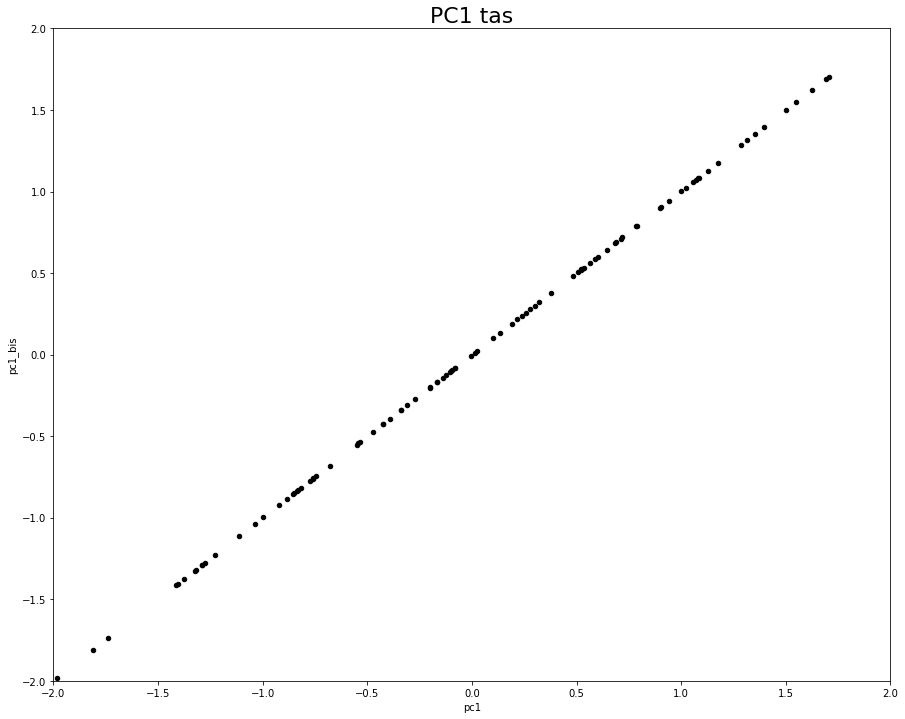

In [23]:
ax = plt.gca()
title = 'PC1 tas'

df.plot(kind='scatter', x='pc1', y='pc1_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-2.0,2.0)
plt.xlim(-2.0,2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

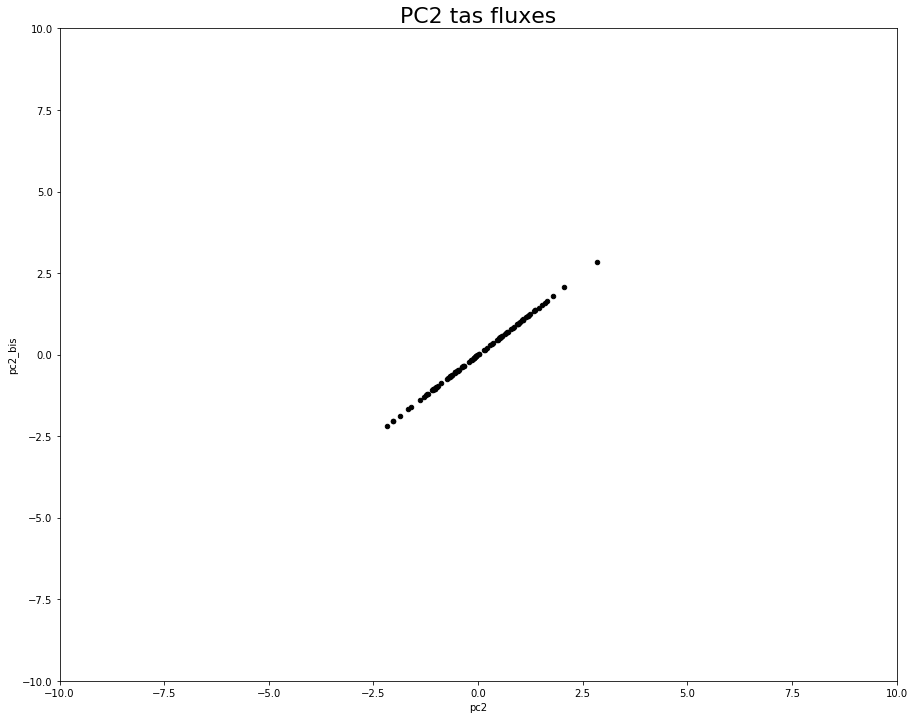

In [24]:
ax = plt.gca()
title = 'PC2 tas fluxes'

df.plot(kind='scatter', x='pc2', y='pc2_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

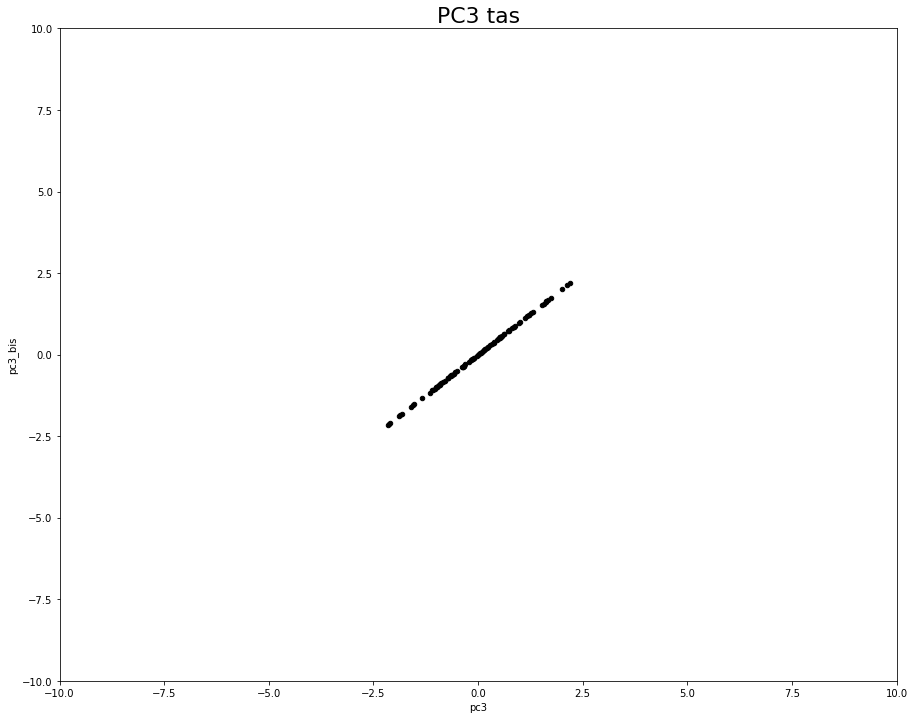

In [25]:
ax = plt.gca()
title = 'PC3 tas'

df.plot(kind='scatter', x='pc3', y='pc3_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [26]:
X_obs_bis = X_obs.expand_dims(dim={'dummy':range(0,102,1)})
X_obs_bis

<xarray.DataArray (dummy: 102, lat: 128, lon: 256)>
array([[[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]],

       [[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]],

       [[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]],

       ...,

       [[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]],

       [[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]],

       [[2.8849945, 2.8667297, 2.8484955, ..., 2.942978 , 2.923645 ,
         2.9042969],
        [0.9043884, 0.8335266, 0.7626343, ..., 1.2228851, 1.116684 ,
         1.0105591],
        [1.3111572, 1.1709595, 1.0308075, ..., 1.5764923, 1.7502747,
         1.5307465],
        ...,
        [2.3730164, 2.407837 , 2.442566 , ..., 2.2760925, 2.2704468,
         2.3217163],
        [2.8766327, 2.8941803, 2.9116669, ..., 2.8075104, 2.8305511,
         2.853592 ],
        [3.9787598, 3.9831238, 3.9875183, ..., 3.958435 , 3.965271 ,
         3.9720154]]], dtype=float32)
Coordinates:
  * dummy    (dummy) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U7 'tasmean'

In [27]:
U_obs = np.dot(eofs_inv,X_obs_bis.transpose('lon','lat', 'dummy'))
#U_ens = U_ens.mean(dim=['lat','lon'])#.transpose()
U_obs

array([[[[-1.1603245 , -1.1603245 , -1.1603245 , ..., -1.1603245 ,
          -1.1603245 , -1.1603245 ],
         [-1.3825729 , -1.3825729 , -1.3825729 , ..., -1.3825729 ,
          -1.3825729 , -1.3825729 ],
         [-1.3784122 , -1.3784122 , -1.3784122 , ..., -1.3784122 ,
          -1.3784122 , -1.3784122 ],
         ...,
         [-1.4775789 , -1.4775789 , -1.4775789 , ..., -1.4775789 ,
          -1.4775789 , -1.4775789 ],
         [-1.3810135 , -1.3810135 , -1.3810135 , ..., -1.3810135 ,
          -1.3810135 , -1.3810135 ],
         [-1.3845524 , -1.3845524 , -1.3845524 , ..., -1.3845524 ,
          -1.3845524 , -1.3845524 ]],

        [[-1.2630345 , -1.2630345 , -1.2630345 , ..., -1.2630345 ,
          -1.2630345 , -1.2630345 ],
         [-1.1326538 , -1.1326538 , -1.1326538 , ..., -1.1326538 ,
          -1.1326538 , -1.1326538 ],
         [-1.1569467 , -1.1569467 , -1.1569467 , ..., -1.1569467 ,
          -1.1569467 , -1.1569467 ],
         ...,
         [-1.0777152 , -1.0777152 

In [28]:
U_obs = xr.DataArray(U_obs, dims=['lon','eofs','lon2', 'dummy'])
U_obs_avg = U_obs[0,:,0,0].transpose()
U_obs_avg

<xarray.DataArray (eofs: 5)>
array([-1.1603245 , -1.2630345 ,  0.53940547, -0.34980834, -2.749889  ],
      dtype=float32)
Dimensions without coordinates: eofs

In [30]:
#Save the U_obs_avg 
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/U_ERAI_tas.npy', U_obs_avg)